#### Figure 5

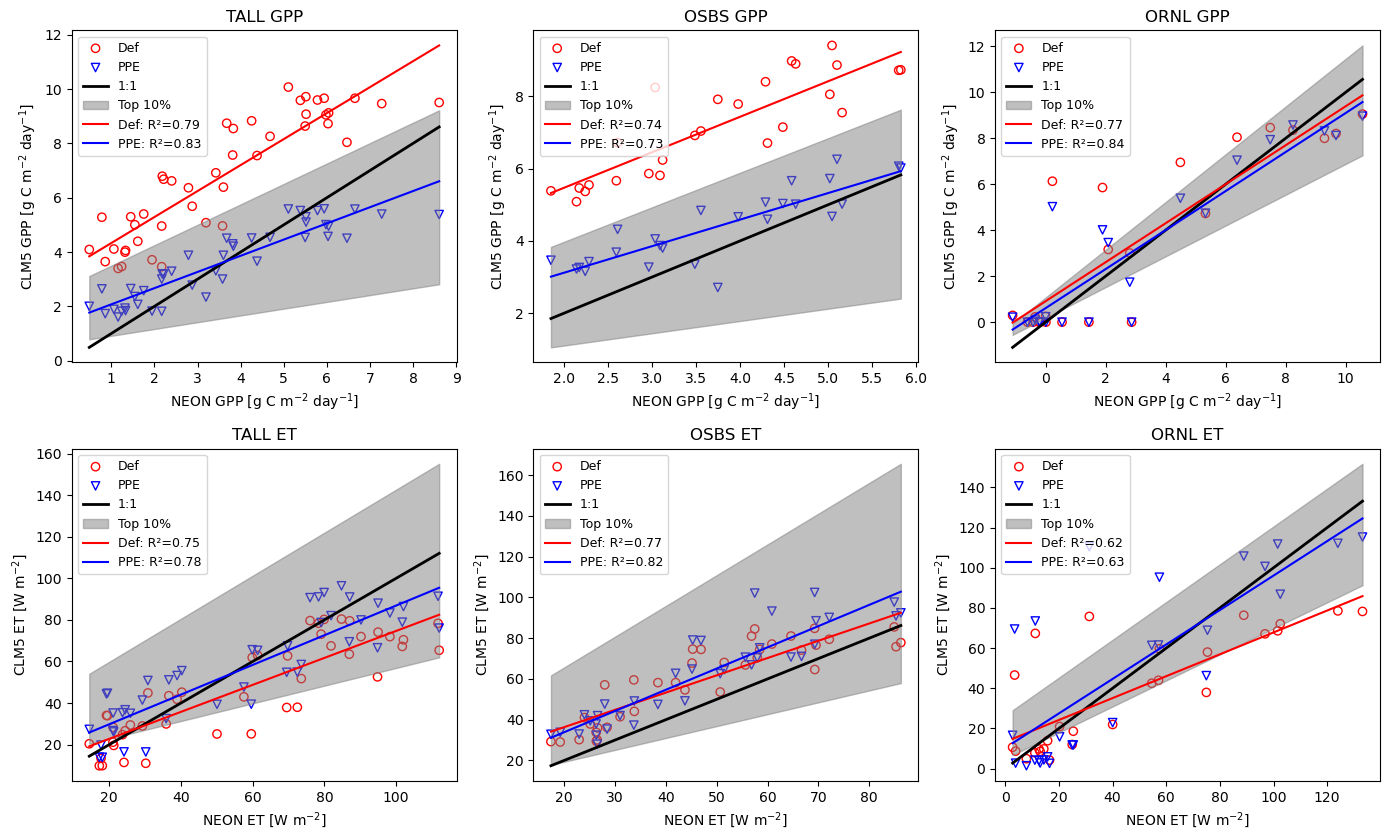

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- load saved data ---
df = pd.read_csv("figure5_data.csv", parse_dates=["Time"])

# --- plotting helper ---
def plot_site(ax, site, var, subdf):
    obs = subdf["Obs"].values
    def_vals = subdf["Def"].values
    best_vals = subdf["Best"].values
    top10_min = subdf["Top10_min"].values
    top10_max = subdf["Top10_max"].values

    mask = ~np.isnan(obs) & ~np.isnan(def_vals) & ~np.isnan(best_vals)
    obs, def_vals, best_vals, top10_min, top10_max = \
        obs[mask], def_vals[mask], best_vals[mask], top10_min[mask], top10_max[mask]

    sort_idx = np.argsort(obs)
    obs_sorted = obs[sort_idx]
    obs_s, def_s, best_s = obs[sort_idx], def_vals[sort_idx], best_vals[sort_idx]
    tmin_s, tmax_s = top10_min[sort_idx], top10_max[sort_idx]

    ax.scatter(obs, def_vals, facecolors="none", edgecolors="red", marker="o", label="Def")
    ax.scatter(obs, best_vals, facecolors="none", edgecolors="blue", marker="v", label="PPE")

    ax.plot(obs_s, obs_s, "k-", lw=2, label="1:1")
    
    # envelope (top10 regression fits)
    smin, imin = np.polyfit(obs, top10_min, 1)
    smax, imax = np.polyfit(obs, top10_max, 1)
    trend_line_min = smin * obs_s + imin
    trend_line_max = smax * obs_s + imax
    ax.fill_between(obs_s, trend_line_min, trend_line_max,
                    color="grey", alpha=0.5, label="Top 10%")

    # regression lines
    for vals, color, tag in [(def_vals, "r", "Def"), (best_vals, "b", "PPE")]:
        s, i = np.polyfit(obs, vals, 1)
        r2 = np.corrcoef(obs, vals)[0, 1] ** 2
        ax.plot(obs_s, s * obs_s + i, f"{color}-", lw=1.5, label=f"{tag}: R²={r2:.2f}")

    if var == "GPP":
        ax.set_xlabel("NEON GPP [g C m$^{-2}$ day$^{-1}$]")
        ax.set_ylabel("CLM5 GPP [g C m$^{-2}$ day$^{-1}$]")
    else:
        ax.set_xlabel("NEON ET [W m$^{-2}$]")
        ax.set_ylabel("CLM5 ET [W m$^{-2}$]")

    ax.set_title(f"{site} {var}")
    ax.legend(loc="upper left", fontsize=9)

# --- build figure ---
fig, axs = plt.subplots(2, 3, figsize=(14, 8.5))
sites = ["TALL", "OSBS", "ORNL"]
vars = ["GPP", "ET"]

for i, site in enumerate(sites):
    for j, var in enumerate(vars):
        sub = df[(df["Site"] == site) & (df["Variable"] == var)]
        plot_site(axs[j, i], site, var, sub)

plt.tight_layout()
plt.savefig("Figure_5.png", dpi=300, bbox_inches="tight")
plt.show()

#### Figure 6

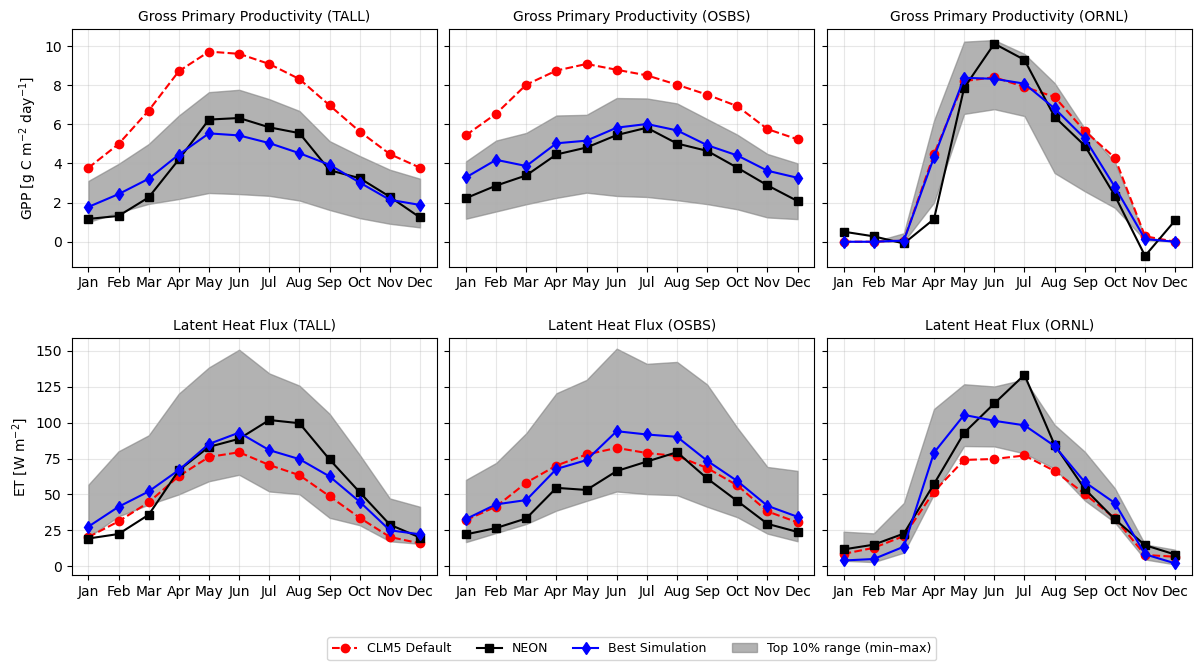

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load saved data ---
df = pd.read_csv("figure6_data.csv")

# --- Styles ---
line_styles = {
    "CLM":  {"color": "red",  "marker": "o", "linestyle": "--", "label": "CLM5 Default"},
    "NEON": {"color": "black","marker": "s", "linestyle": "-",  "label": "NEON"},
    "Best": {"color": "blue", "marker": "d", "linestyle": "-",  "label": "Best Simulation"},
}

# --- Plot ---
fig, axis = plt.subplots(2, 3, figsize=(14, 7), sharey='row')
sites = ['TALL', 'OSBS', 'ORNL']
variables = ['GPP', 'ET']

for i, site in enumerate(sites):
    for j, var in enumerate(variables):
        ax = axis[j, i]
        sub = df[(df["Site"] == site) & (df["Variable"] == var)]

        months = np.arange(1, 13)
        ax.plot(months, sub["CLM_Default"], **line_styles["CLM"])
        ax.plot(months, sub["NEON"], **line_styles["NEON"])
        ax.plot(months, sub["Best"], **line_styles["Best"])

        # --- Top10% envelope ---
        # Sort for smooth fill_between
        sort_idx = np.argsort(sub["Month"])
        m = sub["Month"].values[sort_idx]
        ymin = sub["Top10_Min"].values[sort_idx]
        ymax = sub["Top10_Max"].values[sort_idx]

        ax.fill_between(m, ymin, ymax, color="gray", alpha=0.6,
                        label="Top 10% range (min–max)")

        # --- Titles & labels ---
        if j == 0:
            ax.set_title(f"Gross Primary Productivity ({site})", fontsize=10)
        else:
            ax.set_title(f"Latent Heat Flux ({site})", fontsize=10)

        if i == 0 and j == 0:
            ax.set_ylabel("GPP [g C m$^{-2}$ day$^{-1}$]")
        elif i == 0 and j == 1:
            ax.set_ylabel("ET [W m$^{-2}$]")

        ax.set_xticks(range(1, 13))
        ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun',
                            'Jul','Aug','Sep','Oct','Nov','Dec'])
        ax.grid(alpha=0.3)

# --- Legend ---
handles, labels = axis[0, 2].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.01),
           fontsize=9, fancybox=True, shadow=False, ncol=6)

fig.set_facecolor('white')
plt.subplots_adjust(left=0.1, bottom=0.12, right=0.9, top=0.9,
                    wspace=0.035, hspace=0.30)
plt.savefig("Figure_6.png", dpi=300, bbox_inches="tight")
plt.show()

#### Figure S3

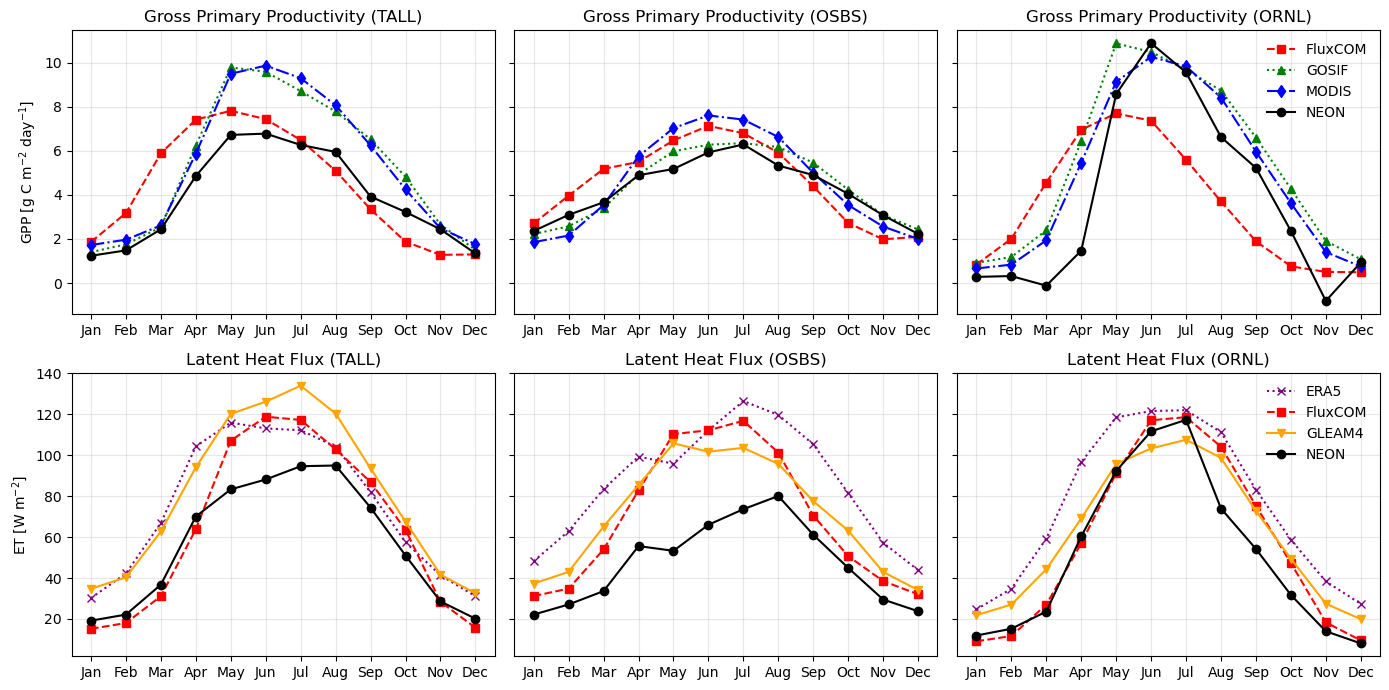

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Load saved data ---
df = pd.read_csv("figureS3_data.csv")

sites = ["TALL", "OSBS", "ORNL"]
month_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

styles = {
    "NEON":     {"color": "black", "linestyle": "-",  "marker": "o", "label": "NEON"},
    "FluxCOM":  {"color": "red",   "linestyle": "--", "marker": "s", "label": "FluxCOM"},
    "MODIS":    {"color": "blue",  "linestyle": "-.", "marker": "d", "label": "MODIS"},
    "GOSIF":    {"color": "green", "linestyle": ":",  "marker": "^", "label": "GOSIF"},
    "GLEAM4":   {"color": "orange","linestyle": "-",  "marker": "v", "label": "GLEAM4"},
    "ERA5":     {"color": "purple","linestyle": ":",  "marker": "x", "label": "ERA5"}
}

# --- Plot ---
fig, axes = plt.subplots(2, 3, figsize=(14, 7), sharey='row')

for i, site in enumerate(sites):
    # --- GPP ---
    ax = axes[0, i]
    sub_gpp = df[(df["Site"] == site) & (df["Variable"] == "GPP")]
    for prod, subp in sub_gpp.groupby("Product"):
        subp = subp.sort_values("Month")
        ax.plot(subp["Month"], subp["Value"], **styles.get(prod, {}))
    ax.set_title(f"Gross Primary Productivity ({site})", fontsize=12)
    ax.set_xticks(range(1, 13)); ax.set_xticklabels(month_labels)
    ax.grid(alpha=0.3)
    if i == len(sites)-1:
        ax.legend(frameon=False)

    # --- ET ---
    ax = axes[1, i]
    sub_et = df[(df["Site"] == site) & (df["Variable"] == "ET")]
    for prod, subp in sub_et.groupby("Product"):
        subp = subp.sort_values("Month")
        ax.plot(subp["Month"], subp["Value"], **styles.get(prod, {}))
    ax.set_title(f"Latent Heat Flux ({site})", fontsize=12)
    ax.set_xticks(range(1, 13)); ax.set_xticklabels(month_labels)
    ax.grid(alpha=0.3)
    if i == len(sites)-1:
        ax.legend(frameon=False)

axes[0,0].set_ylabel("GPP [g C m$^{-2}$ day$^{-1}$]")
axes[1,0].set_ylabel("ET [W m$^{-2}$]")
plt.tight_layout()
plt.savefig("Figure_S3.png", dpi=300, bbox_inches="tight")
plt.show()

#### Figure 7

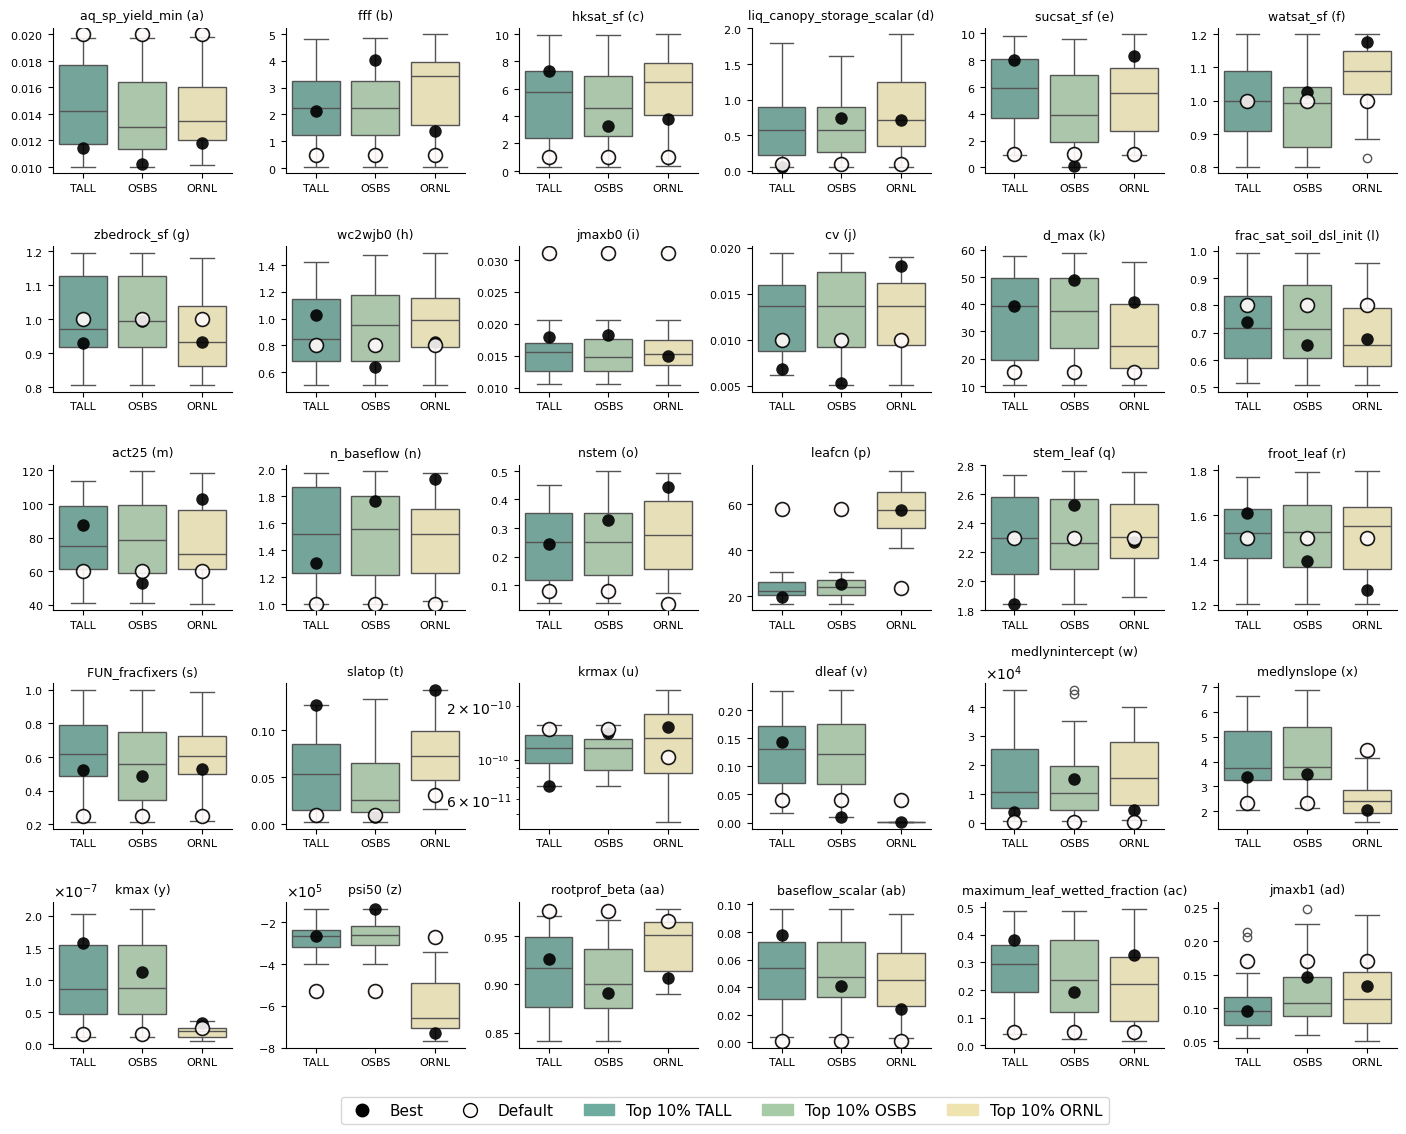

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import ScalarFormatter
import string

# --- Load saved data ---
df_all = pd.read_csv("figure7_data.csv")
param_bounds = pd.read_csv("figure7_param_bounds.csv", index_col=0)

# --- Setup ---
site_order  = ["TALL", "OSBS", "ORNL"]
site_colors = {"TALL": "#6DAC9E", "OSBS": "#A7CBA7", "ORNL": "#EFE4B0"}

params = df_all["param"].unique()
alphabet_labels = list(string.ascii_lowercase)
extended_labels = alphabet_labels + [f"a{letter}" for letter in alphabet_labels[:10]]

# --- Prepare legend items ---
legend_items = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black',
               markeredgecolor='black', markersize=9, label="Best"),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='snow',
               markeredgecolor='black', markersize=10, label="Default")
]
for site, color in site_colors.items():
    legend_items.append(mpatches.Patch(color=color, label=f"Top 10% {site}"))

# --- Plot grid ---
fig, axes = plt.subplots(5, 6, figsize=(16, 12))

for idx, (param, ax) in enumerate(zip(params, axes.flatten())):
    dsub = df_all[df_all["param"] == param]

    # Boxplot (top10)
    sns.boxplot(ax=ax, x="Site", y="value", data=dsub[dsub["Category"] == "Top10"],
                order=site_order, hue="Site", palette=site_colors, legend=False)

    # Best points
    sns.stripplot(ax=ax, x="Site", y="value", data=dsub[dsub["Category"] == "Best"],
                  order=site_order, color='black', size=9, alpha=0.9, edgecolor='black')

    # Default points
    sns.stripplot(ax=ax, x="Site", y="value", data=dsub[dsub["Category"] == "Default"],
                  order=site_order, color='snow', size=10, alpha=0.9,
                  edgecolor='black', linewidth=1.2)

    ax.set_title(f"{param} ({extended_labels[idx]})", fontsize=9)
    ax.set(ylabel=None, xlabel=None)
    ax.tick_params(axis='both', labelsize=8)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Apply log scale only for krmax
    if param == "krmax":
        ax.set_yscale("log")
    else:
        ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
        ax.ticklabel_format(style='scientific', axis='y', scilimits=(-3, 3))

    # Min/max reference lines
    if param in param_bounds.index:
        ax.axhline(param_bounds.loc[param, "min"], linestyle='dashdot',
                   color='grey', linewidth=1)
        ax.axhline(param_bounds.loc[param, "max"], linestyle='dashdot',
                   color='grey', linewidth=1)

# Remove unused axes if any
for j in range(len(params), len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

# --- Global legend ---
fig.legend(handles=legend_items, loc='lower center', bbox_to_anchor=(0.5, 0.03),
           ncol=5, prop={'size': 11}, markerscale=1)

plt.subplots_adjust(left=0.08, right=0.92, top=0.95, bottom=0.1,
                    hspace=0.5, wspace=0.3)
plt.savefig("Figure7.png", dpi=300, bbox_inches="tight")
plt.show()

#### Figure 10

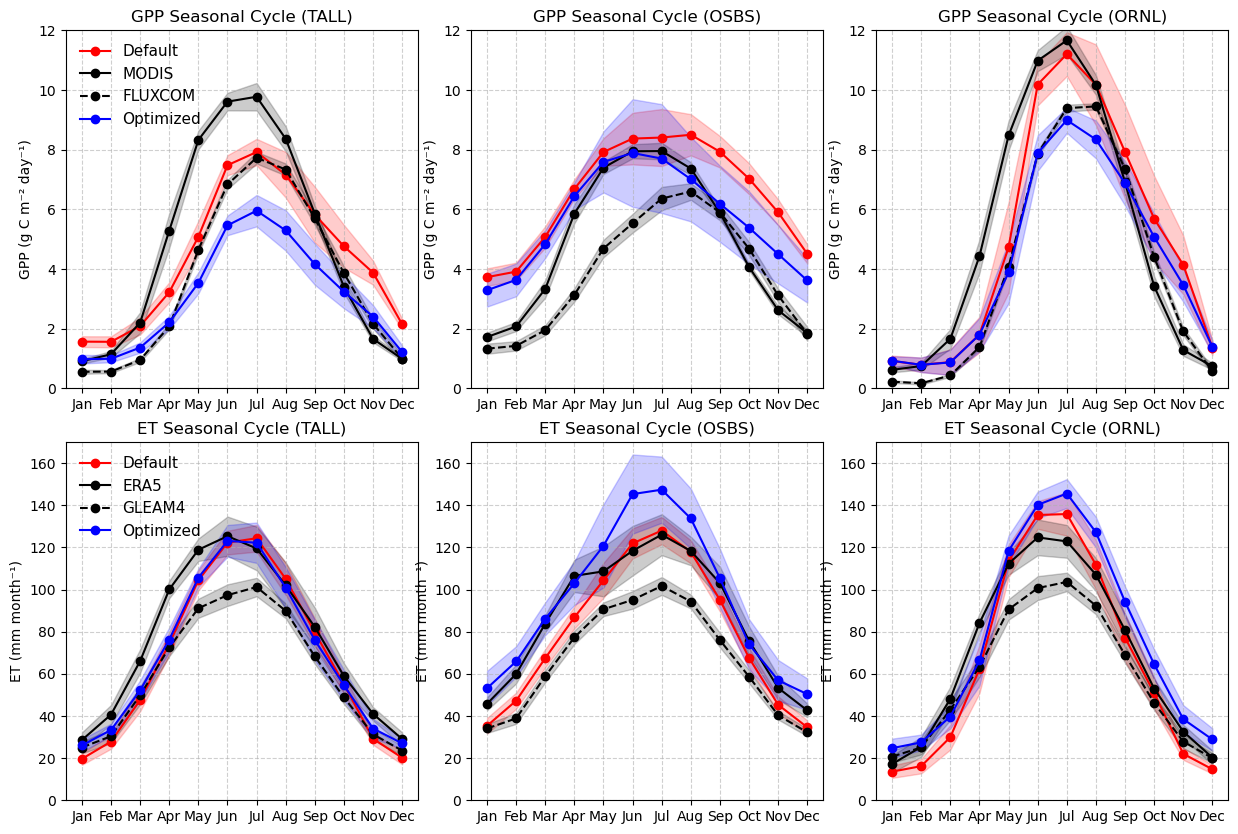

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Load saved data ---
df = pd.read_csv("figure10_regional_data.csv")

# --- Style dictionary ---
line_styles = {
    "DEF":     {"color": "red",   "linestyle": "-",  "marker": "*", "label": "CLM5-Default"},
    "MODIS":   {"color": "black", "linestyle": "-",  "marker": "s", "label": "MODIS"},
    "FLUXCOM": {"color": "black", "linestyle": "--", "marker": "^", "label": "FLUXCOM"},
    "GOSIF":   {"color": "black", "linestyle": "-.", "marker": "x", "label": "GOSIF"},
    "ERA5":    {"color": "black", "linestyle": "-",  "marker": "d", "label": "ERA5"},
    "GLEAM":   {"color": "black", "linestyle": "--", "marker": "v", "label": "GLEAM"},
    "CAL":     {"color": "blue",  "linestyle": "-",  "marker": "o", "label": "Optimized"}
}

def plot_with_variability(ax, months, mean, std, style):
    ax.plot(months, mean, color=style["color"], linestyle=style["linestyle"],
            marker=style["marker"], label=style["label"])
    ax.fill_between(months, mean - std, mean + std, color=style["color"], alpha=0.2)

# --- Layout ---
sites = ["TALL", "OSBS", "ORNL"]
month_labels = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

fig, axes = plt.subplots(2, 3, figsize=(12, 8), sharey='row')
fig.subplots_adjust(hspace=0.15, wspace=0.15)

# --- GPP row ---
for ax, site in zip(axes[0, :], sites):
    sub = df[(df["Variable"] == "GPP") & (df["Site"] == site)]
    months = np.arange(1, 13)
    for prod in ["DEF", "MODIS", "FLUXCOM", "GOSIF", "CAL"]:
        subp = sub[sub["Product"] == prod]
        if not subp.empty:
            plot_with_variability(ax, months, subp["Mean"], subp["Std"], line_styles[prod])
    ax.set_title(f"GPP ({site})")
    ax.set_xticks(months)
    ax.set_xticklabels(month_labels)
    ax.grid(True, linestyle="--", alpha=0.5)
axes[0,0].set_ylabel("GPP (gC m⁻² day⁻¹)")
axes[0,0].legend(loc="upper left", fontsize=10, frameon=False)

# --- ET row ---
for ax, site in zip(axes[1, :], sites):
    sub = df[(df["Variable"] == "ET") & (df["Site"] == site)]
    months = np.arange(1, 13)
    for prod in ["DEF", "ERA5", "GLEAM", "FLUXCOM", "CAL"]:
        subp = sub[sub["Product"] == prod]
        if not subp.empty:
            plot_with_variability(ax, months, subp["Mean"], subp["Std"], line_styles[prod])
    ax.set_title(f"ET ({site})")
    ax.set_xticks(months)
    ax.set_xticklabels(month_labels)
    ax.grid(True, linestyle="--", alpha=0.5)
axes[1,0].set_ylabel("ET (mm/month)")
axes[1,0].legend(loc="upper left", fontsize=10, frameon=False)

plt.tight_layout()
plt.savefig("Figure_10.png", dpi=300, bbox_inches="tight")
plt.show()